<h2 align="center">Classification of Text Data</h2>

**Problem Statement:** Classify whether a given text belongs to one of possible classes `['BUSINESS', 'SPORTS', 'CRIME']` based on text.

**About Data: News Category Classifier**
* This data consists of two columns. - Text - Category
* Text are the description about a particular topic.
* Category determine which class the text belongs to.
* we have classes mainly of 'BUSINESS', 'SPORTS', 'CRIME' and comes under Multi-class classification Problem.
* DataSet Link: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

**Methods:**
* Pre-Processing: Spacy
* Word to Vector: Spacy wrord embedding
* Normalization: MinMax Scalar
* Imabalnced Data: SMOTE
* Modelling: ML Classification methods which are best for text data (MultinomialNB, RandomForest, KNN).
* Evaluaution Metrics: Accuracy, F1-Score

# Importing Required Libabries

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [2]:
#importing Large model
nlp = spacy.load("en_core_web_lg")

In [3]:
#create daraframe

df = pd.read_json("news_dataset.json")
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


# Checking Info & basics

In [4]:
df.shape

(12695, 2)

In [5]:
df.isnull().sum()

text        0
category    0
dtype: int64

In [6]:
#checking is data is balanced

value_counts =  pd.Series(df.category.value_counts())
value_counts

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

As per the required problem statment, we don't want "SCIENCE' Target, hence drop those rows

In [7]:
df = df.drop(index=df[df.category=="SCIENCE"].index)

In [8]:
df.shape

(11314, 2)

In [9]:
value_counts =  pd.Series(df.category.value_counts())
value_counts

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
Name: count, dtype: int64

In [10]:
for category, count in value_counts.items():
    print("Category:", category ," | ", count," | ", "Percentage", "{:.2f}".format(count/df.shape[0]*100),"%")

Category: BUSINESS  |  4254  |  Percentage 37.60 %
Category: SPORTS  |  4167  |  Percentage 36.83 %
Category: CRIME  |  2893  |  Percentage 25.57 %


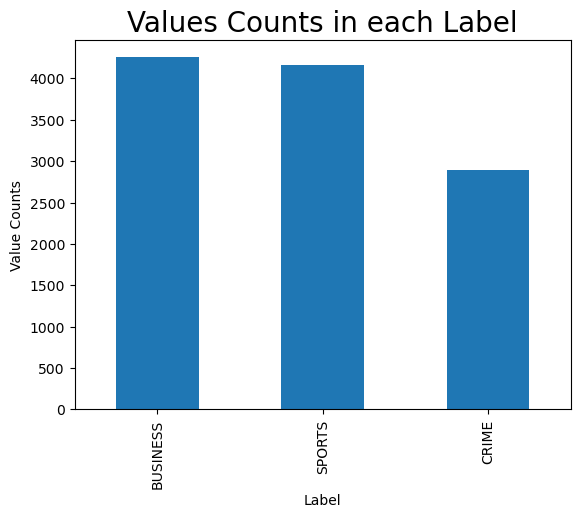

In [11]:
#map

value_counts.plot(kind="bar",  fontsize = 10.00)
plt.xlabel("Label", fontsize=10)
plt.ylabel("Value Counts", fontsize=10)
plt.title("Values Counts in each Label", fontsize=20 )
plt.show()

* Compared to `BUSINESS` and `SPORTS`, `CRIME` having less data, here our target varibles is imblanced
* Hence , we need to make it balanced,  there are so many techniques to make it balance.
* Here, we are going to use oversampling technique `SMOTE (Synthetic Minority Over-sampling Technique)`.

# Label Target Variable

In [12]:
df["category"] = df.category.map({"BUSINESS":0, "SPORTS":1, "CRIME":2})
df.head()

,text,category
2,Entrepreneurs Today Don't Need a Big Budget to...,0
3,These Roads Could Recharge Your Electric Car A...,0
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,2
5,Trump Pays Penalty For Ethically Questionable ...,0
6,LIVE: Argentina vs. Iran,1


# Data is Imbalanced, when we need to appy SMOTE???!!!

The decision of whether to apply SMOTE before or after preprocessing the text data can depend on the specific characteristics of your dataset and the preprocessing steps you plan to perform.

**Apply SMOTE after preprocess:**

* If doing preprocessing techniques like removing stop words, stemming/lemmatization and vectorization (eg. TF-IDF, CountVectorizer).
* Applying SMOTE after preprocessing ensures that the synthetic samples generated by SMOTE are consistent with the processed text data. This can help in creating more meaningful synthetic samples that are closer to the original samples in the feature space.
*  Additionally, applying SMOTE after preprocessing allows you to avoid generating synthetic samples based on noisy or irrelevant text data (e.g., stop words, punctuation) that might be removed during preprocessing.

**Apply SMOTE before preprocessing:**

* If preprocessing steps do not significantly alter the structure of the text data (e.g., lowercasing, basic cleaning), you might choose to apply SMOTE before preprocessing.
* This approach could potentially reduce the computational cost of preprocessing by balancing the dataset before performing expensive text processing operations.



`From above points, here we are considering to apply SMOTE after the preprocessing of text data.`

# Pre- Processing TEXT Data

* Removing the stop words
* Convert to base form  using lemmatization

In [13]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [14]:
#create preprocessed_text

df["preprocessed_text"] = df.text.apply(preprocess)

df.head()

,text,category,preprocessed_text
2,Entrepreneurs Today Don't Need a Big Budget to...,0,entrepreneur today need Big Budget start year ...
3,These Roads Could Recharge Your Electric Car A...,0,road recharge Electric Car drive high tech hig...
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,2,civilian Guard Fires Gun protect Recruiting Ce...
5,Trump Pays Penalty For Ethically Questionable ...,0,Trump Pays Penalty ethically questionable poli...
6,LIVE: Argentina vs. Iran,1,live Argentina vs. Iran


In [15]:
df = df.drop(columns=["text"])
df

,category,preprocessed_text
2,0,entrepreneur today need Big Budget start year ...
3,0,road recharge Electric Car drive high tech hig...
4,2,civilian Guard Fires Gun protect Recruiting Ce...
5,0,Trump Pays Penalty ethically questionable poli...
6,1,live Argentina vs. Iran
...,...,...
12688,0,Basic Premise Social Integration Easy advisors...
12689,2,5 year Old Girl abandon NYC Bus Terminal Mothe...
12690,1,coach shake Hands imaginary Players oppose Tea...
12693,1,Richard Sherman want talk Police shooting Game...


# Get the spacy embeddings for each preprocessed text

In [33]:
df["vector"] = df.preprocessed_text.apply(lambda x: nlp(x).vector)

In [34]:
df.head()

,category,preprocessed_text,vector
2,0,entrepreneur today need Big Budget start year ...,"[0.088981755, 0.5882564, -1.2281352, -0.320762..."
3,0,road recharge Electric Car drive high tech hig...,"[-1.0280653, 4.349204, -1.06896, -1.045683, 1...."
4,2,civilian Guard Fires Gun protect Recruiting Ce...,"[-1.4220493, 0.9367255, -1.8070079, 3.1870718,..."
5,0,Trump Pays Penalty ethically questionable poli...,"[-0.81497276, 0.061516695, -2.0144162, 2.39536..."
6,1,live Argentina vs. Iran,"[-0.87503004, 1.0373, -2.0184674, 3.4055748, 3..."


# Train Test Split

To avoid data leakage & maintain integrity in our evaluation process we are doing train test split first

In [35]:
x_train, x_test, y_train, y_test = train_test_split(df.vector.values, df.category, random_state=52, test_size=0.2, stratify=df.category)

In [36]:
x_train.shape

(9051,)

In [37]:
y_train.shape

(9051,)

In [38]:
x_test.shape

(2263,)

In [39]:
y_test.shape

(2263,)

In [40]:
y_train.value_counts()

category
0    3403
1    3334
2    2314
Name: count, dtype: int64

In [41]:
y_test.value_counts()

category
0    851
1    833
2    579
Name: count, dtype: int64

In [47]:
x_train

array([array([-5.58773756e-01, -6.33907557e-01,  6.53664991e-02, -1.81815028e-01,
               1.36143625e+00,  7.04450309e-02,  1.56875253e+00,  2.00585008e+00,
              -1.03698874e+00, -3.34957123e-01,  1.86109746e+00,  1.11142635e+00,
              -7.07257509e-01, -1.19236791e+00,  1.09577131e+00, -4.15208757e-01,
               5.76087415e-01, -2.73553759e-01, -1.02887630e+00,  1.02406836e+00,
               1.98023841e-02, -2.28228241e-01, -1.04858112e+00, -3.19525898e-02,
               4.96987402e-02, -1.31990111e+00, -6.20797515e-01,  1.50711238e-01,
               7.86236286e-01,  1.49360609e+00,  4.34370071e-01,  9.66227472e-01,
               1.20395374e+00,  1.05816901e+00, -2.15381885e+00, -9.47781205e-01,
               1.44888729e-01,  6.48363769e-01,  5.68598747e-01,  1.21690118e+00,
              -9.98331785e-01, -7.72443771e-01, -3.91902626e-01, -6.35349989e-01,
              -1.31917667e+00, -1.61308736e-01,  1.22308671e+00, -1.17020881e+00,
              -3

In [48]:
#convert 3d array to 2d array  using numpy stack function

x_train_stacked = np.stack(x_train)
x_test_stacked = np.stack(x_test)

In [49]:
x_train_stacked

array([[-0.55877376, -0.63390756,  0.0653665 , ..., -0.47889873,
        -0.54421246,  0.906425  ],
       [-0.66212386,  1.6298574 , -1.8782207 , ..., -0.49799335,
        -0.6647041 ,  1.2279761 ],
       [-1.06845   , -4.758225  , -2.0748823 , ..., -1.404475  ,
         0.90263003,  1.542925  ],
       ...,
       [-0.5489926 , -0.6502565 , -0.05375253, ..., -1.5209299 ,
         0.7281289 ,  0.6360236 ],
       [-3.4309719 , -2.8488665 , -8.338318  , ...,  0.26500335,
        -0.08931831,  4.6130214 ],
       [-0.92354584, -0.99708927,  1.2289842 , ...,  0.10794783,
         0.5698021 , -0.09563709]], dtype=float32)

# Balancing Imabalned Data by SMOTE

In [42]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

In [50]:
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_stacked, y_train)

In [52]:
y_train_resampled.value_counts()

category
1    3403
0    3403
2    3403
Name: count, dtype: int64

_Woww!!!! it's nice our `training data is balanced now`...._

# Modelling:

<h2>Random Forest:</h2>

In [54]:
#Create pipeline for DT model

rf_pipeline = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('clf', RandomForestClassifier()) 
])

In [55]:
rf_pipeline.fit(x_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', RandomForestClassifier())])

In [56]:
y_pred = rf_pipeline.predict(x_test_stacked)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       851
           1       0.89      0.87      0.88       833
           2       0.86      0.85      0.85       579

    accuracy                           0.87      2263
   macro avg       0.87      0.87      0.87      2263
weighted avg       0.87      0.87      0.87      2263



In [58]:
rf_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_pred))
rf_f1_score = "{:.4f}".format(f1_score(y_test, y_pred, average='macro'))
rf_precision_score =  "{:.4f}".format(precision_score(y_test, y_pred, average='macro'))
rf_recall_score =  "{:.4f}".format(recall_score(y_test, y_pred, average='macro'))

In [59]:
train_accuracy = rf_pipeline.score(x_train_resampled, y_train_resampled)
test_accuracy = rf_pipeline.score(x_test_stacked, y_test)

In [60]:
# create dataframe to track all models details

model_scores = pd.DataFrame( [["Random Forest", train_accuracy,test_accuracy, rf_f1_score, rf_accuracy_score, rf_precision_score, rf_recall_score]],
                              columns= [ "Model", "Train Accuracy", "Test Accuracy", "F1 Score", "Accuracy Score", "Precision", "Recall"])

model_scores

,Model,Train Accuracy,Test Accuracy,F1 Score,Accuracy Score,Precision,Recall
0,Random Forest,1.0,0.874503,0.8721,0.8745,0.8731,0.8714


<h2>Decision Tree:</h2>

In [61]:
#Create pipeline for DT model

dt_pipeline = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('clf', DecisionTreeClassifier()) 
])

dt_pipeline.fit(x_train_resampled, y_train_resampled)

y_pred = dt_pipeline.predict(x_test_stacked)

dt_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_pred))
dt_f1_score = "{:.4f}".format(f1_score(y_test, y_pred, average='macro'))
dt_precision_score =  "{:.4f}".format(precision_score(y_test, y_pred, average='macro'))
dt_recall_score =  "{:.4f}".format(recall_score(y_test, y_pred, average='macro'))

train_accuracy = "{:.4f}".format(dt_pipeline.score(x_train_resampled, y_train_resampled))
test_accuracy = "{:.4f}".format(dt_pipeline.score(x_test_stacked, y_test))

print(" Classification Report - Decision Tree Model:\n",classification_report(y_test, y_pred))

 Classification Report - Decision Tree Model:               precision    recall  f1-score   support

           0       0.77      0.78      0.77       851
           1       0.73      0.74      0.73       833
           2       0.71      0.69      0.70       579

    accuracy                           0.74      2263
   macro avg       0.74      0.73      0.74      2263
weighted avg       0.74      0.74      0.74      2263



In [63]:
new_details =pd.DataFrame( {
    "Model": "Decision Tree",
    "Train Accuracy": [train_accuracy],
    "Test Accuracy":[ test_accuracy ],
    "F1 Score": [dt_f1_score],
    "Accuracy Score": [dt_accuracy_score],
    "Precision": [dt_precision_score],
    "Recall": [dt_recall_score]
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Model,Train Accuracy,Test Accuracy,F1 Score,Accuracy Score,Precision,Recall
0,Random Forest,1.0,0.874503,0.8721,0.8745,0.8731,0.8714
1,Decision Tree,1.0000,0.7397,0.7353,0.7397,0.7364,0.7343


In [64]:
model_scores= model_scores.drop(columns=["Train Accuracy", "Test Accuracy"])
model_scores

,Model,F1 Score,Accuracy Score,Precision,Recall
0,Random Forest,0.8721,0.8745,0.8731,0.8714
1,Decision Tree,0.7353,0.7397,0.7364,0.7343


<h2>MultinomialNB:</h2>

In [78]:
#Create pipeline for DT model

dt_pipeline = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('clf', MultinomialNB()) 
])

dt_pipeline.fit(x_train_resampled, y_train_resampled)

y_pred = dt_pipeline.predict(x_test_stacked)

model_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_pred))
model_f1_score = "{:.4f}".format(f1_score(y_test, y_pred, average='macro'))
model_precision_score =  "{:.4f}".format(precision_score(y_test, y_pred, average='macro'))
model_recall_score =  "{:.4f}".format(recall_score(y_test, y_pred, average='macro'))

print(" Classification Report - MultinomialNB Model:\n",classification_report(y_test, y_pred))

 Classification Report - MultinomialNB Model:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       851
           1       0.85      0.80      0.82       833
           2       0.80      0.87      0.83       579

    accuracy                           0.83      2263
   macro avg       0.83      0.83      0.83      2263
weighted avg       0.83      0.83      0.83      2263



In [79]:
new_details =pd.DataFrame( {
    "Model": "MultinomialNB",
    "F1 Score": [model_f1_score],
    "Accuracy Score": [model_accuracy_score],
    "Precision": [model_precision_score],
    "Recall": [model_recall_score]
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Model,F1 Score,Accuracy Score,Precision,Recall
0,Random Forest,0.8721,0.8745,0.8731,0.8714
1,Decision Tree,0.7353,0.7397,0.7364,0.7343
2,MultinomialNB,0.8289,0.8285,0.8264,0.8332


<h2> KNeighborsClassifier</h2>

In [80]:
#Create pipeline for KNeighborsClassifier model

pipeline = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('clf', KNeighborsClassifier()) 
])

pipeline.fit(x_train_resampled, y_train_resampled)

y_pred = pipeline.predict(x_test_stacked)

model_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_pred))
model_f1_score = "{:.4f}".format(f1_score(y_test, y_pred, average='macro'))
model_precision_score =  "{:.4f}".format(precision_score(y_test, y_pred, average='macro'))
model_recall_score =  "{:.4f}".format(recall_score(y_test, y_pred, average='macro'))

print(" Classification Report - KNeighborsClassifier Model:\n",classification_report(y_test, y_pred))

 Classification Report - KNeighborsClassifier Model:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       851
           1       0.93      0.77      0.84       833
           2       0.70      0.94      0.80       579

    accuracy                           0.84      2263
   macro avg       0.84      0.85      0.84      2263
weighted avg       0.86      0.84      0.84      2263



In [81]:
new_details =pd.DataFrame( {
    "Model": "KNeighborsClassifier",
    "F1 Score": [model_f1_score],
    "Accuracy Score": [model_accuracy_score],
    "Precision": [model_precision_score],
    "Recall": [model_recall_score]
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Model,F1 Score,Accuracy Score,Precision,Recall
0,Random Forest,0.8721,0.8745,0.8731,0.8714
1,Decision Tree,0.7353,0.7397,0.7364,0.7343
2,MultinomialNB,0.8289,0.8285,0.8264,0.8332
3,KNeighborsClassifier,0.8357,0.8378,0.8411,0.8480


<h2>GradientBoostingClassifier</h2>

In [82]:
#Create pipeline for GradientBoostingClassifier model

pipeline = Pipeline([
    ('scaler', MinMaxScaler()), 
    ('clf', GradientBoostingClassifier()) 
])

pipeline.fit(x_train_resampled, y_train_resampled)

y_pred = pipeline.predict(x_test_stacked)

model_accuracy_score = "{:.4f}".format(accuracy_score(y_test, y_pred))
model_f1_score = "{:.4f}".format(f1_score(y_test, y_pred, average='macro'))
model_precision_score =  "{:.4f}".format(precision_score(y_test, y_pred, average='macro'))
model_recall_score =  "{:.4f}".format(recall_score(y_test, y_pred, average='macro'))

print(" Classification Report - GradientBoostingClassifier Model:\n",classification_report(y_test, y_pred))

 Classification Report - GradientBoostingClassifier Model:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       851
           1       0.91      0.88      0.90       833
           2       0.86      0.88      0.87       579

    accuracy                           0.90      2263
   macro avg       0.89      0.89      0.89      2263
weighted avg       0.90      0.90      0.90      2263



In [85]:
new_details =pd.DataFrame( {
    "Model": "GradientBoostingClassifier",
    "F1 Score": [model_f1_score],
    "Accuracy Score": [model_accuracy_score],
    "Precision": [model_precision_score],
    "Recall": [model_recall_score]
})
model_scores = pd.concat([model_scores, new_details], ignore_index=True)
model_scores

,Model,F1 Score,Accuracy Score,Precision,Recall
0,Random Forest,0.8721,0.8745,0.8731,0.8714
1,Decision Tree,0.7353,0.7397,0.7364,0.7343
2,MultinomialNB,0.8289,0.8285,0.8264,0.8332
3,KNeighborsClassifier,0.8357,0.8378,0.8411,0.8480
4,GradientBoostingClassifier,0.8928,0.8953,0.8922,0.8936


<h2>Conclusion:</h2>

In [90]:
model_scores.sort_values(by=["Accuracy Score"], ascending=False)

,Model,F1 Score,Accuracy Score,Precision,Recall
4,GradientBoostingClassifier,0.8928,0.8953,0.8922,0.8936
0,Random Forest,0.8721,0.8745,0.8731,0.8714
3,KNeighborsClassifier,0.8357,0.8378,0.8411,0.8480
2,MultinomialNB,0.8289,0.8285,0.8264,0.8332
1,Decision Tree,0.7353,0.7397,0.7364,0.7343


`GradientBoostingClassifier` is giving a best results in all the metrics

In [91]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm



array([[782,  38,  31],
       [ 49, 734,  50],
       [ 35,  34, 510]], dtype=int64)

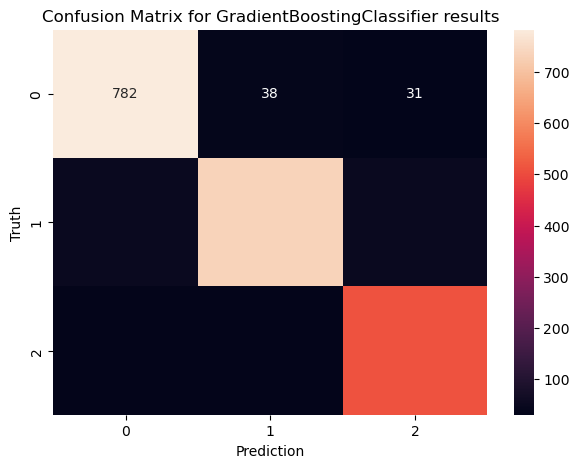

In [97]:
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix for GradientBoostingClassifier results")
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()